# SUPPORT VECTOR MACHINES

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

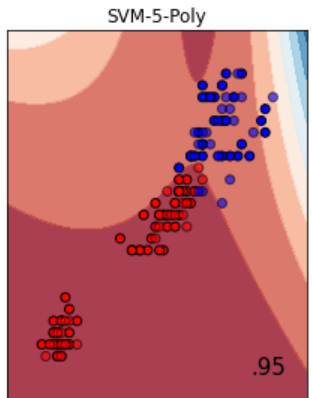

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display_functions import display
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [30]:
# 1) Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
iris_dataset = load_iris()
X = iris_dataset.data[:, 2:4]
y = iris_dataset.target

In [31]:
# 2) Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)

# Target variable represents class of a flower (such as 0,1,2) I will get 1 and 2
two_class_dataset = X[50:]
two_class_target = y[50:]
iris_dataframe = pd.DataFrame(data=np.c_[two_class_dataset, two_class_target],
                              columns=["petal length (cm)", "petal width (cm)", "target"])
display(iris_dataframe)

,petal length (cm),petal width (cm),target
0,4.7,1.4,1.0
1,4.5,1.5,1.0
2,4.9,1.5,1.0
3,4.0,1.3,1.0
4,4.6,1.5,1.0
...,...,...,...
95,5.2,2.3,2.0
96,5.0,1.9,2.0
97,5.2,2.0,2.0
98,5.4,2.3,2.0


In [32]:
def plot_2d_examples(classifiers, names, datasets, figsize=(27, 9), h=.02):
    """
    Here we define a helper method. We want to make a lot of visualizations, so lets
    organize the visualization code into a method we can re-use.
    - classifiers is a list of scikit-learn classifier objects
    - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
    - datasets will be a list of 2D datasets, each being a tuple of (X, y)
    - h is the step size of the mesh. Smaller sizes show more detail
    """
    figure = plt.figure(figsize=figsize)
    i = 1

    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.3)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    plt.tight_layout()
    plt.show()

In [33]:
# 3.Get your new dataset ready to be fed into the provided plot_2d_examples function.

prepared_dataset = [[two_class_dataset, two_class_target]]

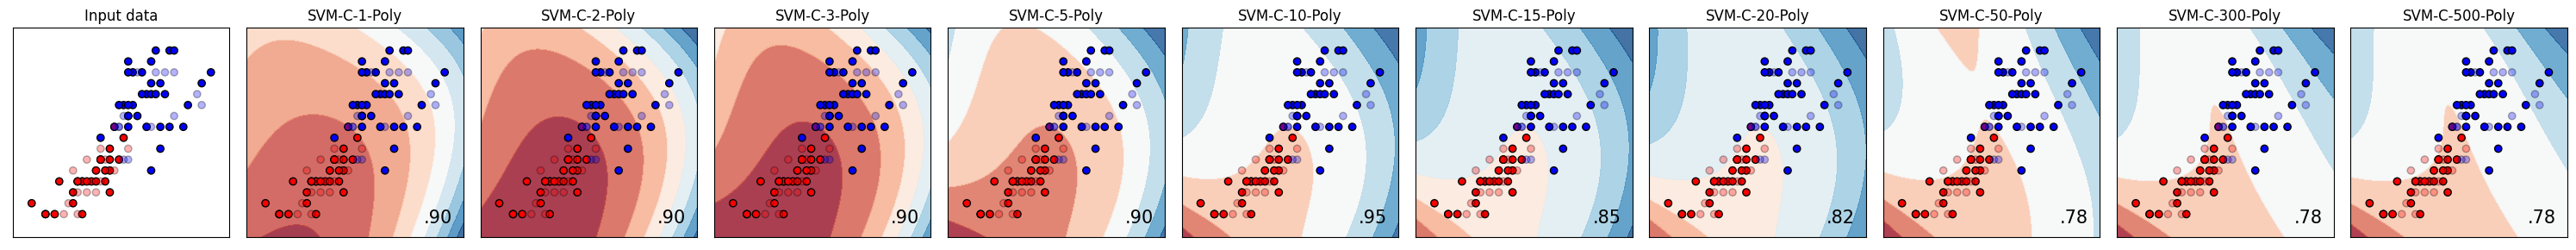

In [34]:
# 4.Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with polynomial kernels of varying degrees. Also, try several C values

"""
I tried the value of c with different numbers and fixed degree. Within the results that can be drawn from the graphs, I aimed to find out in which interval the value of c should be found and to be tested with different degrees. C's getting too large (50+) on this dataset has a negative effect. The C value gives the best score when 3 and 10, with a rough estimate we can max limit the C value to 10 for the best result.
"""

classifiers = []
names = []
for c in [1, 2, 3, 5, 10, 15, 20, 50, 300, 500]:
    classifiers.append(SVC(kernel='poly', degree=4, gamma='scale', coef0=1.0, C=c))
    names.append("SVM-C-" + str(c) + "-Poly")
plot_2d_examples(classifiers, names, prepared_dataset, figsize=(30, 3))

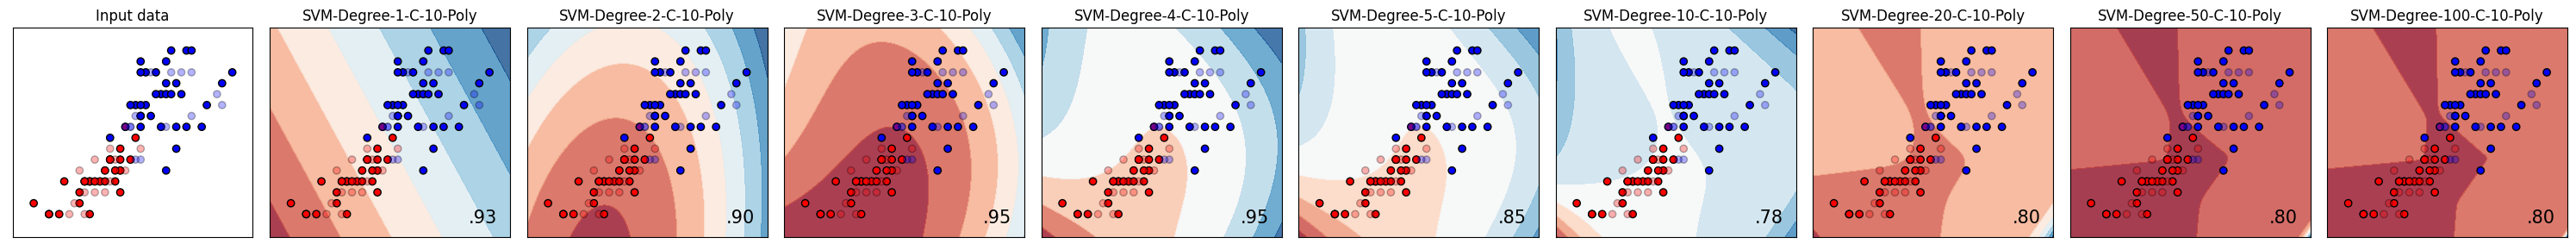

In [35]:
"""
Here I tried different degrees by fixing the C value. I have observed that the boundaries are no longer soft at degrees 10 and above. We must avoid linear boundaries. Because it is very difficult to adapt to the data set. For this reason, a fourth-degree graph with softer boundaries, which is not specialized only for the training set, is more appropriate.
"""

classifiers = []
names = []
for d in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    classifiers.append(SVC(kernel='poly', degree=d, gamma='scale', coef0=1.0, C=10))
    names.append("SVM-Degree-" + str(d) + "-C-10" + "-Poly")
plot_2d_examples(classifiers, names, prepared_dataset, figsize=(30, 3))

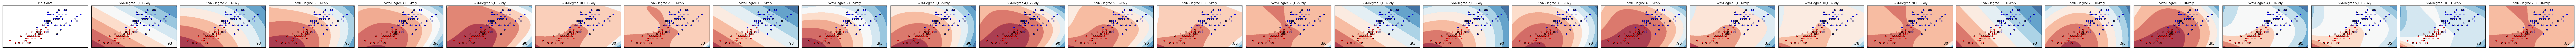

In [36]:
"""
I wrote two nested loops to look at the changes of C and degree values together. Degree 5 and below gives acceptable results, but becomes unacceptable when exceeded. For this reason, I leave the line of code containing high degrees optionally in the comments.
Due to the IDE, some visual differences may occur in the display of the graphics. I would adjust the dimensions to my own platform.  there are high numbers of degrees mentioned in the code block in the comment and If the side-by-side display is too small ,You can also print the graphics in blocks one after the other with commented loop. I use the bottom one for myself!
"""
# for c in [1, 2, 3, 10]:
#     classifiers = [] # For see the graphs line by line
#     names = []
#
#     for d in [1, 2, 3, 5, 10, 20, 50, 100]:
#         classifiers.append(SVC(kernel='poly', degree=d, gamma='scale', coef0=1.0, C=c))
#         names.append("SVM-Degree " + str(d) + ",C " + str(c) + "-Poly")
#     plot_2d_examples(classifiers, names, prepared_dataset, figsize=(15 * c, 3 + c)) # tab line

classifiers = []
names = []
for c in [1, 2, 3, 10]:
    for d in [1, 2, 3, 4, 5, 10, 20]:
        classifiers.append(SVC(kernel='poly', degree=d, gamma='scale', coef0=1.0, C=c))
        names.append("SVM-Degree " + str(d) + ",C " + str(c) + "-Poly")
plot_2d_examples(classifiers, names, prepared_dataset, figsize=(15 * c, 3))  # tab line

5) Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree, C) pair produced the best results? Please indicate your answer explicitly.

DEGREE:
Considering the graphics produced by the above code blocks, it would be optimal if the degree was between 3 and 5. We can both catch/predict non-linear results and avoid over-fitting.Because at larger values, our borders start to fluctuate too much. And the score starts to decrease after 4.The fourth degree can adapt enough to data. Since its borders are soft, it can cover the new data that may come in the future.
Therefore,we accept the optimal degree as 4.

C VALUE:
We can say that the scores on the graphs are 90+ up to the value of C=10. 95 when the maximum score is C=10. After the value of 10 is exceeded, the boundaries begin to become special to the training set. And they turn into concave(iç bükey) shapes. Looking at the score, a dramatic decrease is observed in the continuation. At C=15, it drops to 85 and gets smaller as it increases.Additionally, we observe too rough boundaries for values less than 3. For this reason, it would be good to start our limit for c from 3 to prevent errors that may occur.
It can go down to around 10 and less if possible. As a result, we can say that C = 10 optimally.

RESULT:
The best pair of (degree,C) is (4,10)

 6) Also comment on C values. Which C value range is reasonable do you think? After which value, it looks like an overfit?


In line with the above:

The optimal range for C is between 3 and 10. Conclusion we can prefer C=10 as optimal value.
After 10, around 15 over-fit starts to be observed. Boundaries become very sharp and convoluted.

In [39]:
# REFERENCES
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html -> Make a data set with only two feature